# Análisis exploratorio de datos

## Cargo librerías y funciones

In [1]:
# !pip3 install pandas_datareader

In [2]:
#conda update -n base -c defaults conda

In [3]:
#!conda install -c plotly plotly

In [4]:
from IPython.display import display, Markdown

import datetime, warnings

warnings.filterwarnings('ignore')

from pandas_datareader import wb

import numpy as np
import pandas as pd
import seaborn as sns


In [5]:
#display(plotly.__version__)
#display(pd.__version__)

In [6]:
def print_columns(df):
    display(Markdown('#### List of columns:'))
    text = '| '
    for x in range(0, df.shape[1]):
        text = text + df.columns.values[x] + ' | '
    return text

def explore_var(df,var,limit=20):
    cant=df.nunique()
    df_full = df.value_counts().rename_axis('unique_values').reset_index(name='counts')
    df_full = df_full.sort_values(by=['counts'],ascending=False)
    topLimit= df_full[0:limit]
    t1='\nThere are **'+str(cant)+'** different value in the **'+str(var)+'** variable of the dataframe.'
    if cant<=1:
        t1='\nThere is **only one** different value in the **'+str(var)+'** variable of the dataframe.'
        t2 ='The value is:'  
    elif cant>=limit:
        t2='The list of the first **'+str(limit)+'**  values:'
        df_full = topLimit
    else:
        t2 ='The list of the **'+str(cant)+'**  values:'    
    display(Markdown(t1))
    display(Markdown(t2))
    return df_full

def print_last(df):
    display(df.tail(1))
    
def missing_zero_values_table(df):
    zero_val=df.isin([0]).sum(axis=0)
    mis_val=df.isnull().sum()
    l=len(df)
    mis_val_percent=100*df.isnull().sum()/l
    zero_val_percent=100*df.isin([0]).sum()/l
    mz_table=pd.concat([zero_val,zero_val_percent,mis_val,mis_val_percent],axis=1)
    mz_table=mz_table.rename(
        columns={
            0:'Zero Values', 
            1:'% of Zero Values', 
            2:'Missing Values', 
            3:'% of Missing Values'}
    )
    mz_table['Total Missing Values']=mz_table['Zero Values']+mz_table['Missing Values']
    mz_table['% Total Missing Values']=100*mz_table['Total Missing Values']/l
    mz_table=mz_table[mz_table.iloc[:,4] != 0].sort_values(
    '% Total Missing Values', ascending=False).round(1)
    tc=str(df.shape[1])
    tr=str(df.shape[0])
    tcm=str(mz_table.shape[0])
    txt='Your selected dataframe has '+str(tc)+' columns and '+str(tr)+' Rows.'
    txt+='\nThere are '+str(tcm)+' columns that have missing values.'
    display(mz_table)
    return txt


### Settings 

In [7]:
# Setting pandas df print
# pd.set_option('display.max_columns', None)
# pd.set_option('display.expand_frame_repr', False)
# pd.set_option('max_colwidth', None)


# Format round off to two decimal places in pandas 
pd.options.display.float_format = '{: .2f}'.format

## Banco Mundial - Usuarios de Internet

In [8]:
start = datetime.datetime(1990, 1, 1)
end = datetime.datetime(2021, 1, 1)
indicator_id1 = 'IT.NET.USER.ZS'

# data1 = wb.download(indicator=indicator_id1, start=start, end=end, country=[])
data1 = wb.download(indicator=indicator_id1, start=start, end=end, country=['ARG','WLD'])
data1 = data1.reset_index()
data1

,country,year,IT.NET.USER.ZS
0,Argentina,2020,NaN
1,Argentina,2019,NaN
2,Argentina,2018,NaN
3,Argentina,2017,74.29
4,Argentina,2016,70.97
...,...,...,...
57,World,1994,0.36
58,World,1993,0.18
59,World,1992,0.13
60,World,1991,0.08


### EDA

#### Valores Faltantes

In [9]:
# Datos faltantes
missing_zero_values_table(data1)

,Zero Values,% of Zero Values,Missing Values,% of Missing Values,Total Missing Values,% Total Missing Values
IT.NET.USER.ZS,2,3.20,4,6.50,6,9.70


'Your selected dataframe has 3 columns and 62 Rows.\nThere are 1 columns that have missing values.'

In [10]:
# Paso a cero los valores faltantes
data1 = data1.fillna(0)
missing_zero_values_table(data1)

,Zero Values,% of Zero Values,Missing Values,% of Missing Values,Total Missing Values,% Total Missing Values
IT.NET.USER.ZS,6,9.70,0,0.00,6,9.70


'Your selected dataframe has 3 columns and 62 Rows.\nThere are 1 columns that have missing values.'

#### Variable types

In [11]:
# data types
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         62 non-null     object 
 1   year            62 non-null     object 
 2   IT.NET.USER.ZS  62 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.6+ KB


#### Estadisticos

In [12]:
#estadisticos
data1.describe()

,IT.NET.USER.ZS
count,62.00
mean,20.16
std,22.00
min,0.00
25%,0.30
50%,12.06
75%,34.12
max,74.29


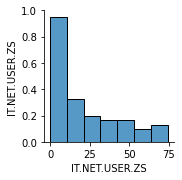

In [13]:
sns.pairplot(data1)

#### Duplicados

In [14]:
duplicates = data1[data1.duplicated()]
print('La cantidad de elementos duplicados es:', duplicates.shape[0])

La cantidad de elementos duplicados es: 0


#### Tamaño

In [15]:
# Examino el tamaño
missing_zero_values_table(data1)

,Zero Values,% of Zero Values,Missing Values,% of Missing Values,Total Missing Values,% Total Missing Values
IT.NET.USER.ZS,6,9.70,0,0.00,6,9.70


'Your selected dataframe has 3 columns and 62 Rows.\nThere are 1 columns that have missing values.'

### Output

In [16]:
output_file  = indicator_id1 + '.csv'
data1.to_csv(output_file, index=False)

## Banco Mundial - Suscripiones a banda ancha fija

In [17]:
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2021, 1, 1)
indicator_id2 = 'IT.NET.BBND.P2'
# data2 = wb.download(indicator=indicator_id2, start=start, end=end, country=[])
data2 = wb.download(indicator=indicator_id2, start=start, end=end, country=['ARG','WLD'])
data2 = data2.reset_index()
data2

,country,year,IT.NET.BBND.P2
0,Argentina,2020,21.18
1,Argentina,2019,19.64
2,Argentina,2018,19.10
3,Argentina,2017,17.85
4,Argentina,2016,16.67
5,Argentina,2015,15.92
6,Argentina,2014,15.29
7,Argentina,2013,14.81
8,Argentina,2012,12.33
9,Argentina,2011,11.06


### EDA

#### Valores Faltantes

In [18]:
# Datos faltantes
missing_zero_values_table(data2)

,Zero Values,% of Zero Values,Missing Values,% of Missing Values,Total Missing Values,% Total Missing Values
IT.NET.BBND.P2,0,0.00,2,4.80,2,4.80


'Your selected dataframe has 3 columns and 42 Rows.\nThere are 1 columns that have missing values.'

#### variable Types

In [19]:
# data types
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         42 non-null     object 
 1   year            42 non-null     object 
 2   IT.NET.BBND.P2  40 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.1+ KB


#### Estadísticos

In [20]:
#estadisticos
data2.describe()

,IT.NET.BBND.P2
count,40.00
mean,9.28
std,6.11
min,0.25
25%,3.94
50%,9.17
75%,14.64
max,21.18


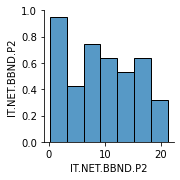

In [21]:
sns.pairplot(data2)

#### Duplicados

In [22]:
duplicates = data2[data2.duplicated()]
print('La cantidad de elementos duplicados es:', duplicates.shape[0])

La cantidad de elementos duplicados es: 0


#### Tamaño

In [23]:
# Examino el tamaño
missing_zero_values_table(data2)

,Zero Values,% of Zero Values,Missing Values,% of Missing Values,Total Missing Values,% Total Missing Values
IT.NET.BBND.P2,0,0.00,2,4.80,2,4.80


'Your selected dataframe has 3 columns and 42 Rows.\nThere are 1 columns that have missing values.'

### Output

In [24]:
output_file  = indicator_id2 + '.csv'
data2.to_csv(output_file, index=False)